![](CintillaTecNM-ITD.png)

    
# Analisis de Datos Masivos

## Analisis 1 sobre COVID con Python

## Nombre del Docente
### Jose Gabriel Rodriguez Rivas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [4]:
# cargar en dataframe el archivo de Información referente  a casos COVID-19 en México,
# El archivo se descargo del portal de datos abiertos del gobierno de Mexico,
# Disponible en la URL  https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

df=pd.read_csv('201014COVID19MEXICO.csv', encoding = "ISO-8859-1")

# Obtener el numero de registros y de variables (columnas)
df.shape

# Al 14 de Ocubre son 2,127,667  Casos analizados para COVID

(2127667, 38)

In [5]:
# Visualizamos los primeros 5 registros para ver el contenido
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-10-14,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
1,2020-10-14,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,2020-10-14,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1
3,2020-10-14,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
4,2020-10-14,002371,1,4,3,2,3,3,8,1,...,2,2,99,1,1,3,99,MÃ©xico,97,97


In [8]:
# Mostrar informacion de las variables (columnas) del conjunto de 
# datos del COVID
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127667 entries, 0 to 2127666
Data columns (total 38 columns):
FECHA_ACTUALIZACION    object
ID_REGISTRO            object
ORIGEN                 int64
SECTOR                 int64
ENTIDAD_UM             int64
SEXO                   int64
ENTIDAD_NAC            int64
ENTIDAD_RES            int64
MUNICIPIO_RES          int64
TIPO_PACIENTE          int64
FECHA_INGRESO          object
FECHA_SINTOMAS         object
FECHA_DEF              object
INTUBADO               int64
NEUMONIA               int64
EDAD                   int64
NACIONALIDAD           int64
EMBARAZO               int64
HABLA_LENGUA_INDIG     int64
INDIGENA               int64
DIABETES               int64
EPOC                   int64
ASMA                   int64
INMUSUPR               int64
HIPERTENSION           int64
OTRA_COM               int64
CARDIOVASCULAR         int64
OBESIDAD               int64
RENAL_CRONICA          int64
TABAQUISMO             int64
OTRO_CASO   

In [9]:
# Eliminamos las columnas que no son de nuestro interes
df.drop(['FECHA_ACTUALIZACION','ID_REGISTRO','ENTIDAD_RES','MUNICIPIO_RES', 'ENTIDAD_UM',
               'HABLA_LENGUA_INDIG','INDIGENA', 'MIGRANTE', 'PAIS_NACIONALIDAD','PAIS_ORIGEN',
               'OTRO_CASO'],axis=1,inplace=True)


In [10]:
# Visualizamos nuevamente  los primeros 5 registros para ver el cambio realizado
df.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,UCI
0,2,9,2,21,1,2020-03-18,2020-03-12,9999-99-99,97,2,...,2,2,1,2,2,2,1,1,3,97
1,1,4,1,15,1,2020-04-02,2020-03-27,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,3,97
2,2,4,2,9,2,2020-03-26,2020-03-26,2020-03-30,2,1,...,1,2,2,2,1,2,1,1,3,1
3,1,4,2,15,2,2020-03-28,2020-03-28,2020-04-02,2,1,...,2,2,2,2,2,2,1,1,3,2
4,1,4,2,3,1,2020-03-31,2020-03-27,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,3,97


In [12]:
# Nuevamente verificamos la informacion para asegurarnos de que se haya borrado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127667 entries, 0 to 2127666
Data columns (total 27 columns):
ORIGEN                 int64
SECTOR                 int64
SEXO                   int64
ENTIDAD_NAC            int64
TIPO_PACIENTE          int64
FECHA_INGRESO          object
FECHA_SINTOMAS         object
FECHA_DEF              object
INTUBADO               int64
NEUMONIA               int64
EDAD                   int64
NACIONALIDAD           int64
EMBARAZO               int64
DIABETES               int64
EPOC                   int64
ASMA                   int64
INMUSUPR               int64
HIPERTENSION           int64
OTRA_COM               int64
CARDIOVASCULAR         int64
OBESIDAD               int64
RENAL_CRONICA          int64
TABAQUISMO             int64
TOMA_MUESTRA           int64
RESULTADO_LAB          int64
CLASIFICACION_FINAL    int64
UCI                    int64
dtypes: int64(24), object(3)
memory usage: 438.3+ MB


In [31]:
# con la funcion value_counts contamos cuantos casos hay de cada posible resultado
resultados = df['RESULTADO_LAB'].value_counts(sort=False)

#Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 

resultados.rename({1: 'Positivos', 2: 'Negativos', 3: 'Pendientes de entregar resultado', 
                   4:'Resultado No Adecuado', 97:'No Aplica (Caso sin muestra)'}, inplace=True)
resultados

Positivos                           805512
Negativos                           987457
Pendientes de entregar resultado     41778
Resultado No Adecuado                97374
No Aplica (Caso sin muestra)        195546
Name: RESULTADO_LAB, dtype: int64

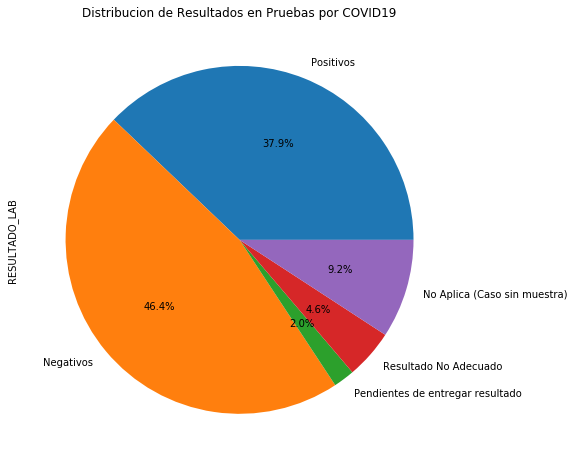

In [154]:
resultados.plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')
plt.title('Distribucion de Resultados en Pruebas por COVID19')
#plt.legend(labels=resultados.index,loc='upper right')
plt.show()

In [148]:
#  verificamos la distribucion de los casos por genero 
generos = df['SEXO'].value_counts(sort=False)

# Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 
generos.rename({1: 'Mujer', 2: 'Hombre', 99:'No Especificado '}, inplace=True)
generos

# De los 2,127,667  Casos analizados, 1,087,686 son Mujeres y  1,039,981 son Hombres

Mujer     1087686
Hombre    1039981
Name: SEXO, dtype: int64

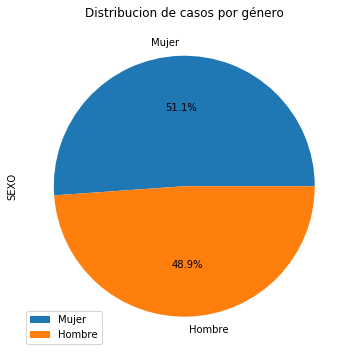

In [143]:
generos.plot(kind='pie',figsize=(10,6), autopct='%1.1f%%')
plt.title('Distribucion de casos por género')
lab = str(generos.index) + str(generos.values)
plt.legend(labels=generos.index,loc='lower left')
plt.show()


## Creamos otro dataframe con los casos positivos 

In [26]:
#Filtro para obtener casos positivos covid y los poonemos en un nuevo dataframe
df_covid_positivos = df['RESULTADO_LAB']==1
df_covid_positivos = df[df_covid_positivos]
len(df_covid_positivos)

# Obtenemos 805,512 casos positivos a COVID

805512

In [30]:
positivos = df_covid_positivos['SEXO'].value_counts(sort=False)

#Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 
positivos.rename({1: 'Mujer', 2: 'Hombre', 99:'No Especificado '}, inplace=True)
positivos

# Como resultado se obtiene que de los positivos 389,285 son Mujeres y 416,227 son hombres
# dando el total de 805,512 positivos a COVID

Mujer     389285
Hombre    416227
Name: SEXO, dtype: int64

In [35]:
df_total_casos_grupo = df.groupby(['RESULTADO_LAB','SEXO']).size().reset_index(name='TOTAL')

### Verificar las enfermedades mas comunes de los que dieron positivo a COVID

In [38]:
# Generar una serie de datos llamada enfermedades_covid_positivos de acuerdo a los que 
# direon resultado a covid y que presentan alguna enfermedad  cronica

enfermedades_covid_positivos = pd.Series({
    'Diabetes' : len(df_covid_positivos.query('DIABETES ==1 & RESULTADO_LAB==1')),
    'EPOC' : len(df_covid_positivos.query('EPOC ==1  & RESULTADO_LAB==1')),
    'ASMA' : len(df_covid_positivos.query('ASMA ==1  & RESULTADO_LAB==1')),
    'Inmusupresion' : len(df_covid_positivos.query('INMUSUPR ==1  & RESULTADO_LAB==1')),
    'Hipertension' : len(df_covid_positivos.query('HIPERTENSION ==1  & RESULTADO_LAB==1')),
    'Cardiovascular' : len(df_covid_positivos.query('CARDIOVASCULAR ==1  & RESULTADO_LAB==1')),
    'Obesidad' : len(df_covid_positivos.query('OBESIDAD ==1 & RESULTADO_LAB==1')),
    'Renal' : len(df_covid_positivos.query('RENAL_CRONICA ==1 & RESULTADO_LAB==1')),
    'Tabaquismo' : len(df_covid_positivos.query('TABAQUISMO ==1 & RESULTADO_LAB==1'))
,
})
enfermedades_covid_positivos

Diabetes          122580
EPOC               11480
ASMA               20761
Inmusupresion       8575
Hipertension      154277
Cardiovascular     15557
Obesidad          143260
Renal              15007
Tabaquismo         58978
dtype: int64

In [50]:
# Ordenar el resultado para graficar
enfermedades_covid_positivos.sort_values(ascending=True, inplace=True)
enfermedades_covid_positivos

Inmusupresion       8575
EPOC               11480
Renal              15007
Cardiovascular     15557
ASMA               20761
Tabaquismo         58978
Diabetes          122580
Obesidad          143260
Hipertension      154277
dtype: int64

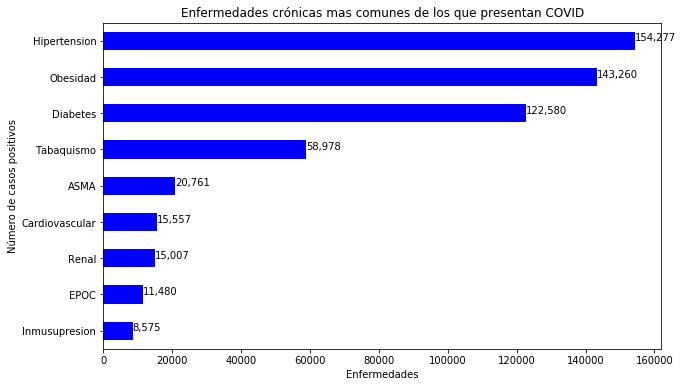

In [53]:
# graficar enfermedades mas comunes de los que presentan COVID
enfermedades_covid_positivos.plot(kind='barh',figsize=(10,6), color='blue')
plt.xlabel('Enfermedades')
plt.ylabel('Número de casos positivos')
plt.title('Enfermedades crónicas mas comunes de los que presentan COVID')
for index, value in enumerate(enfermedades_covid_positivos):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
    
plt.show()

### Verificar las enfermedades mas comunes de los que fallecieron y dieron positivo a COVID

In [56]:
# Generar una serie de datos llamada enfermedades_covid_positivos de acuerdo a los que 
# direon resultado a covid y que presentan alguna enfermedad  cronica

fallecimientos_covid_positivos = pd.Series({
    'Diabetes' : len(df_covid_positivos.query('DIABETES ==1 & FECHA_DEF != "9999-99-99"')),
    'EPOC' : len(df_covid_positivos.query('EPOC ==1  & FECHA_DEF != "9999-99-99"')),
    'ASMA' : len(df_covid_positivos.query('ASMA ==1  & FECHA_DEF != "9999-99-99"')),
    'Inmusupresion' : len(df_covid_positivos.query('INMUSUPR ==1  & FECHA_DEF != "9999-99-99"')),
    'Hipertension' : len(df_covid_positivos.query('HIPERTENSION ==1  & FECHA_DEF != "9999-99-99"')),
    'Cardiovascular' : len(df_covid_positivos.query('CARDIOVASCULAR ==1  & FECHA_DEF != "9999-99-99"')),
    'Obesidad' : len(df_covid_positivos.query('OBESIDAD ==1 & FECHA_DEF != "9999-99-99"')),
    'Renal' : len(df_covid_positivos.query('RENAL_CRONICA ==1 & FECHA_DEF != "9999-99-99"')),
    'Tabaquismo' : len(df_covid_positivos.query('TABAQUISMO ==1 & FECHA_DEF != "9999-99-99"'))
,
})
fallecimientos_covid_positivos

Diabetes          31600
EPOC               4027
ASMA               1656
Inmusupresion      2031
Hipertension      37133
Cardiovascular     4407
Obesidad          20135
Renal              5874
Tabaquismo         6634
dtype: int64

In [57]:
# Ordenar el resultado para graficar
fallecimientos_covid_positivos.sort_values(ascending=True, inplace=True)
fallecimientos_covid_positivos

ASMA               1656
Inmusupresion      2031
EPOC               4027
Cardiovascular     4407
Renal              5874
Tabaquismo         6634
Obesidad          20135
Diabetes          31600
Hipertension      37133
dtype: int64

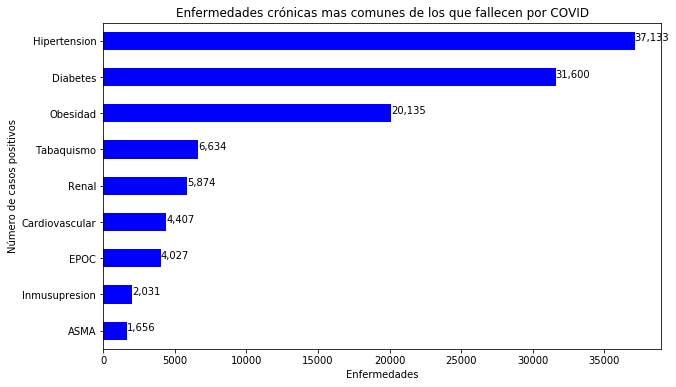

In [64]:
# graficar enfermedades mas comunes de los que presentan COVID
fallecimientos_covid_positivos.plot(kind='barh',figsize=(10,6), color='blue')
plt.xlabel('Enfermedades')
plt.ylabel('Número de casos positivos')
plt.title('Enfermedades crónicas mas comunes de los que fallecen por COVID')
for index, value in enumerate(fallecimientos_covid_positivos):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
    
plt.show()

In [68]:
# Defunciones al 14 0ct 2020
defuncionest = df[df['FECHA_DEF'] != '9999-99-99']
defuncionest.shape[0]

121603

### Casos Ambulatorios y hospitalizados

In [67]:
tipop = df_covid_positivos['TIPO_PACIENTE'].value_counts()
tipop.rename({1: 'Ambulatorio', 2: 'Hospitalizado'}, inplace=True)
tipop

# de 805,512 positivos a COVID, 617,220 casos son ambulatorios y 188,292 fueron hospitalizados

Ambulatorio      617220
Hospitalizado    188292
Name: TIPO_PACIENTE, dtype: int64

### Analisis de casos por edad

In [72]:
# Mostrar el numero de casos positivos a covid por edad
# Aqui hay unos que tienen edad = 0 que puede significar un bebe de meses
# Tambien hay valores de personas mayores a 100 años
# Estos valores para la edad asi viene en la base de datos

edad = df_covid_positivos['EDAD'].value_counts(sort=False)
edad

0       1601
1       1064
2        734
3        678
4        689
5        679
6        819
7        804
8        913
9        999
10      1127
11      1230
12      1365
13      1669
14      1814
15      2147
16      2514
17      3017
18      3586
19      5102
20      6422
21      7369
22      8621
23     10555
24     12342
25     14087
26     15773
27     16692
28     17224
29     17533
       ...  
86      1343
87      1210
88       951
89       779
90       731
91       497
92       358
93       306
94       224
95       215
96       139
97        95
98        99
99        60
100       53
101       16
102       12
103       14
104        6
105        5
106        6
107        4
108        3
109        4
110        1
112        2
114        2
115        1
116        2
118        2
Name: EDAD, Length: 116, dtype: int64

Text(0.5, 1.0, 'Positivos por edad')

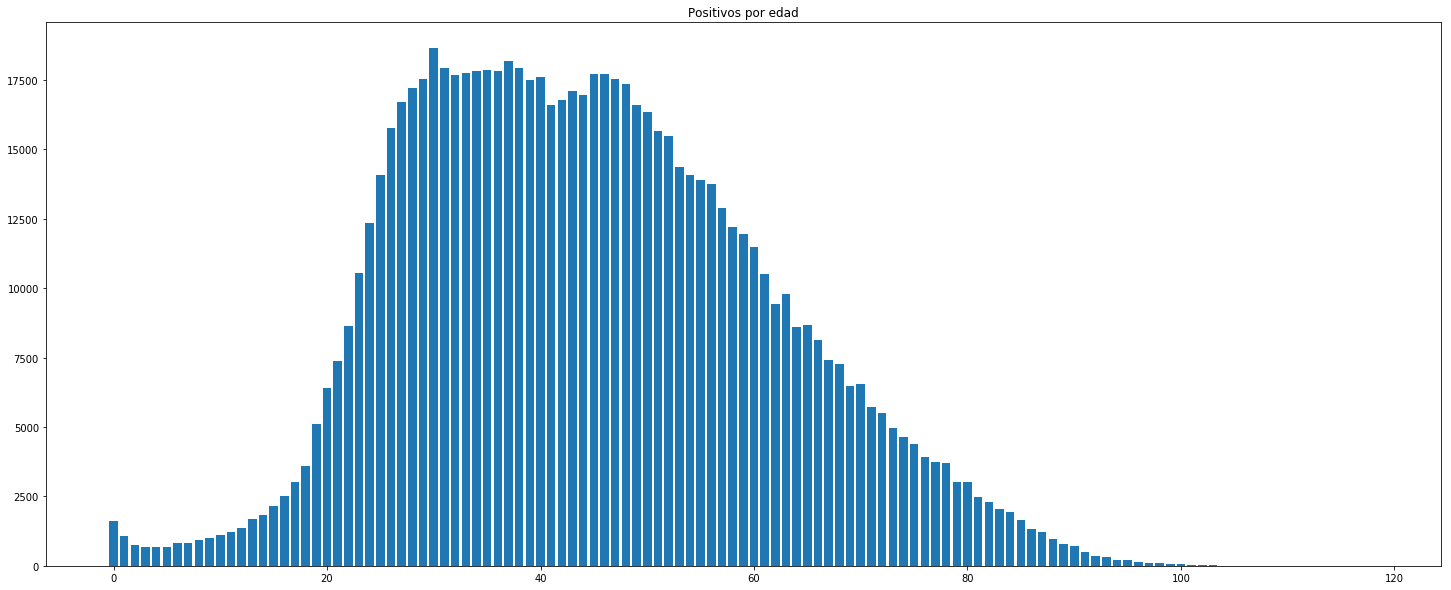

In [70]:
fig, axs = plt.subplots(figsize=(25,10))

axs.bar(edad.index, edad)

axs.set_title('Positivos por edad')

In [102]:
edades_defuncion = df_covid_positivos[(df_covid_positivos.FECHA_DEF != '9999-99-99')]['EDAD'].value_counts().sort_index()

edades_defuncion

0        78
1        47
2        14
3        10
4         6
5         5
6         7
7         5
8         7
9        10
10        9
11        8
12       11
13        9
14       10
15       16
16       14
17       24
18       14
19       27
20       45
21       57
22       63
23       64
24       75
25      105
26      142
27      126
28      138
29      166
       ... 
75     1671
76     1582
77     1557
78     1586
79     1254
80     1310
81     1089
82     1064
83      938
84      864
85      714
86      629
87      581
88      448
89      362
90      313
91      240
92      142
93      147
94       91
95       86
96       61
97       43
98       27
99       20
100      26
101       6
102       2
103       2
106       1
Name: EDAD, Length: 105, dtype: int64

Text(0.5, 1.0, 'Defunciones por edad')

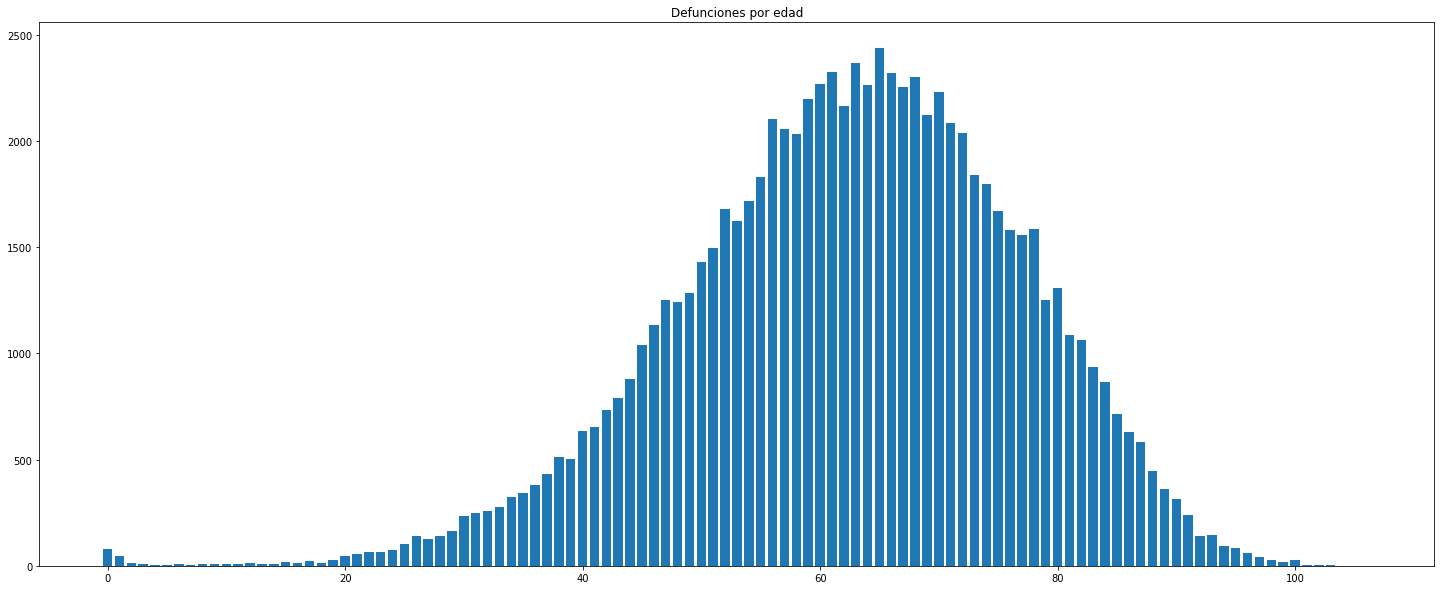

In [80]:
fig, axs = plt.subplots(figsize=(25,10))

axs.bar(edades_defuncion.index, edades_defuncion)

axs.set_title('Defunciones por edad')

## Número de casos verificados por estado

In [91]:
# Creamos un diccionario de datos con las claves de las entidades para poder
# generar reporte donde se muestre el numero de casos por entidad

dic_estados = {1: 'Aguscalientes', 2: 'Baja California', 3:'Baja California Sur', 
               4: 'Campeche', 5: 'Coahuila de zaragoza', 6: 'Colima', 7: 'Chiapas',
              8: 'Chihuahua', 9: 'Ciudad de México', 10: 'Durango', 11: 'Guanajuato',
              12: 'Guerrero', 13: 'Hidalgo', 14: 'Jalisco', 15: 'México', 
               16: 'Michoacan de Ocampo', 17: 'Morelos', 18:'Nayarit', 19: 'Nuevo León',
              20: 'Oaxaca', 21: 'Puebla', 22: 'Querétaro', 23: 'Quintan Roo', 
              24: 'San Luis Potosí', 25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco',
              28: 'Tamaulipas', 29: 'Tlaxcala', 30: 'Veracruz de Ignacio de la llave',
              31: 'Yucatan', 32: 'Zacatecas', 99: 'No especificado'}

In [110]:
casos_por_estado = df['ENTIDAD_NAC'].value_counts(sort=False)

# Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 

casos_por_estado.rename( dic_estados, inplace=True)
casos_por_estado.head(10)

Aguscalientes            26703
Baja California          33790
Baja California Sur      19353
Campeche                 16289
Coahuila de zaragoza     76492
Colima                    9494
Chiapas                  44635
Chihuahua                30340
Ciudad de México        455011
Durango                  33701
Name: ENTIDAD_NAC, dtype: int64

In [111]:
# Ordenar el resultado para graficar y mostrar los primeros 10
casos_por_estado.sort_values(ascending=True, inplace=True)
casos_por_estado.head(10)

Colima                  9494
No especificado         9940
Quintan Roo            12822
Campeche               16289
Querétaro              16606
Nayarit                17345
Morelos                17651
Baja California Sur    19353
Tlaxcala               23567
Zacatecas              24495
Name: ENTIDAD_NAC, dtype: int64

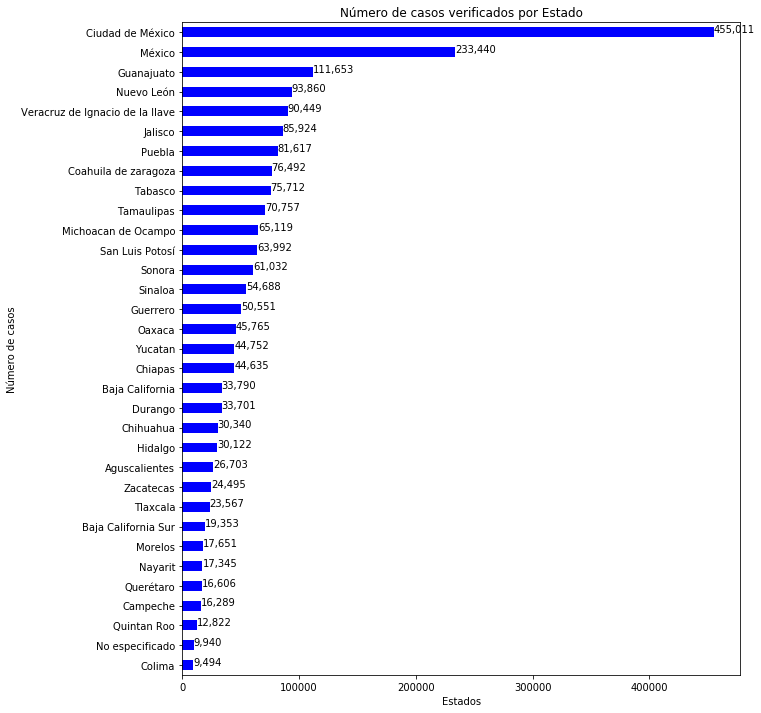

In [155]:
# graficar el numero de casos registrados o analizados para COVID
casos_por_estado.plot(kind='barh',figsize=(10,12), color='blue')
plt.xlabel('Estados')
plt.ylabel('Número de casos')
plt.title('Número de casos verificados por Estado')
for index, value in enumerate(casos_por_estado):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
    
plt.show()

## Número de casos positivos por estado

In [113]:
positivos_por_estado = df_covid_positivos['ENTIDAD_NAC'].value_counts(sort=False)

# Con un diccionario de datos ponemos etiquetas a los codigos en base a los valores usados en el
# catalogo,  disponible en      https://www.gob.mx/salud/documentos/datos-abiertos-152127 
positivos_por_estado.rename( dic_estados, inplace=True)
positivos_por_estado

Aguscalientes                        7430
Baja California                     12379
Baja California Sur                  7363
Campeche                             5824
Coahuila de zaragoza                28854
Colima                               4331
Chiapas                              9801
Chihuahua                           11272
Ciudad de México                   149260
Durango                             11792
Guanajuato                          42700
Guerrero                            25376
Hidalgo                             14040
Jalisco                             30571
México                              78062
Michoacan de Ocampo                 24944
Morelos                              6321
Nayarit                              6751
Nuevo León                          36591
Oaxaca                              24822
Puebla                              33833
Querétaro                            7409
Quintan Roo                          5664
San Luis Potosí                   

In [104]:
df_covid_positivos

,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,UCI
0,2,9,2,21,1,2020-03-18,2020-03-12,9999-99-99,97,2,...,2,2,1,2,2,2,1,1,3,97
1,1,4,1,15,1,2020-04-02,2020-03-27,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,3,97
2,2,4,2,9,2,2020-03-26,2020-03-26,2020-03-30,2,1,...,1,2,2,2,1,2,1,1,3,1
3,1,4,2,15,2,2020-03-28,2020-03-28,2020-04-02,2,1,...,2,2,2,2,2,2,1,1,3,2
4,1,4,2,3,1,2020-03-31,2020-03-27,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,3,97
5,1,12,2,9,1,2020-03-29,2020-03-25,2020-04-05,97,1,...,2,2,2,2,2,2,1,1,3,97
6,1,12,1,9,1,2020-03-30,2020-03-28,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,3,97
7,2,12,1,14,1,2020-04-01,2020-03-28,9999-99-99,97,2,...,2,2,2,2,2,2,1,1,3,97
8,2,4,2,9,2,2020-03-27,2020-03-27,2020-03-31,2,1,...,2,2,2,1,2,2,1,1,3,2
9,1,4,2,23,1,2020-03-24,2020-03-20,9999-99-99,97,1,...,2,2,2,2,2,2,1,1,3,97


In [116]:
# Ordenar el resultado para graficar y mostrar los primeros 10
positivos_por_estado.sort_values(ascending=True, inplace=True)
positivos_por_estado #.head(10)

No especificado                      2644
Colima                               4331
Quintan Roo                          5664
Campeche                             5824
Morelos                              6321
Nayarit                              6751
Baja California Sur                  7363
Querétaro                            7409
Aguscalientes                        7430
Tlaxcala                             8394
Chiapas                              9801
Zacatecas                           10136
Chihuahua                           11272
Durango                             11792
Baja California                     12379
Hidalgo                             14040
Yucatan                             19949
Sonora                              23550
Sinaloa                             23870
Oaxaca                              24822
Michoacan de Ocampo                 24944
Guerrero                            25376
San Luis Potosí                     26512
Tamaulipas                        

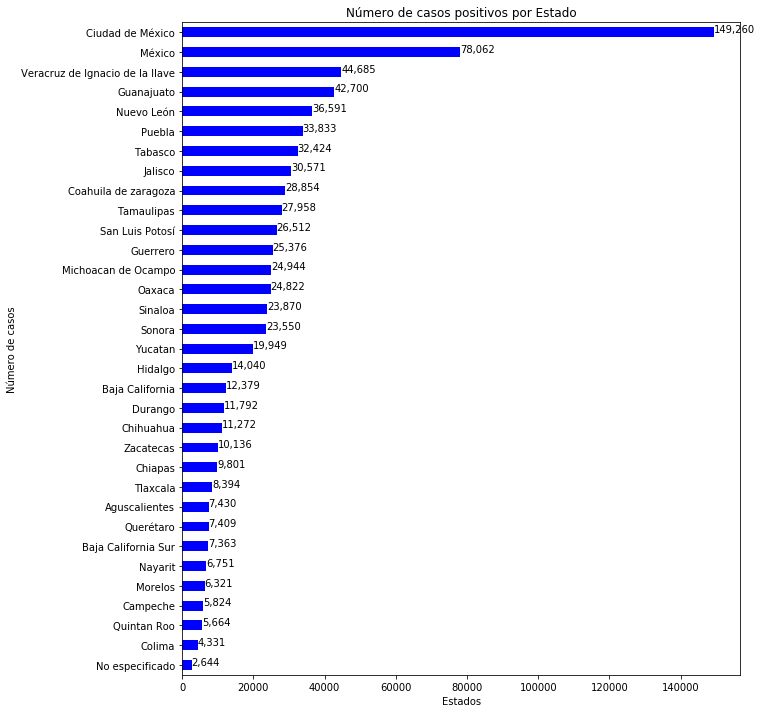

In [156]:
# graficar el numero de casos registrados o analizados para COVID
positivos_por_estado.plot(kind='barh',figsize=(10,12), color='blue')
plt.xlabel('Estados')
plt.ylabel('Número de casos')
plt.title('Número de casos positivos por Estado')
for index, value in enumerate(positivos_por_estado):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
    
plt.show()